In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gensim
from gensim.models import Word2Vec
!pip install gensim



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model_path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'            # Path where the model is stored
model_w2v = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True)            # Loading the model using gensim

In [ ]:
#Creating a .h5 file
dir_path='QA.h5'

In [ ]:
import json
import h5py
import numpy as np
import copy
from random import shuffle, seed
import sys
import os.path
import argparse
import glob
import numpy as np
import scipy.io
import pdb
import string
import h5py
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import gensim
import json
import re
import cv2
import matplotlib.pyplot as plt
import os




def extract_feat(doc):
    '''
    Input: A sentence
    Output : Word Embedding of the sentence

    Note : In order to maintain uniformity in the word embedding of the question, I have used padding (which would be shown later) with a maximum length of 21 (since this
    is the longest length of the question in trainset.json)
  '''
    feat = []
    for word in doc:
        try:
            feat.append(model_w2v[word])
        except:
            pass

            # Return a zero-filled array if feat is empty
    if not feat:
        return np.zeros((1, 300))

    return np.array(feat)
    '''return feat'''

def tokenize(sentence):

    ''' Perform Tokenization '''
    return [i for i in re.split(r"([-.\"',:? !$#@~()*&\^%;/\\+<>\n=])", sentence) if i!='' and i!=' ' and i!='\n'];

def prepro_question(imgs, method):
    # preprocess all the question
    print('example processed tokens:')

    '''
    Input: The question from trainset.json
    Performs tokenization and lowering of the question
    Output: Embedded version of the question

    Note that: We have still not padded the questions, just for information each of the word will be a 300 Dimensional Vector,
    hence, the word vector (which will be obtained after padding) will be a (21,300) Dimensional
    '''
    for i,img in enumerate(imgs):
        s = img['question'].lower()
        if method == 'nltk':
            txt = word_tokenize(str(s).lower())
        else:
            txt = tokenize(s)
        img['processed_tokens'] = txt
        if i < 10: print(txt)
        if i % 1000 == 0:
            sys.stdout.write("processing %d/%d (%.2f%% done)   \r" %  (i, len(img), i*100.0/len(imgs)) )
            sys.stdout.flush()
    return imgs

def get_top_answers(imgs, num_ans):

    """
    Print the questions and returns the time, one answer is repeated
    """
    counts = {}
    for img in imgs:
        try:
            ans = img['answer'].lower()  # If the string is a number, it would result into error
        except :
            ans = str(img['answer'])
        counts[ans] = counts.get(ans, 0) + 1

    cw = sorted([(count,w) for w,count in counts.items()], reverse=True)
    print('top answer and their counts:')
    print('\n'.join(map(str,cw[:20])))
    vocab = []
    for i in range(min(num_ans,len(cw))):
        vocab.append(cw[i][1])

    return vocab[:num_ans]


def filter_question(imgs, atoi):
   '''
   /* Not of much use, I had used it for some other purpose, but did not use it later */
  new_imgs = []
  for i,img in enumerate(imgs):
   new_imgs.append(img)

  print('question number reduce from %d to %d '%(len(imgs), len(new_imgs)))
  return new_imgs'''

   manualMap = { 'none': '0', 'zero': '0', 'one': '1', 'two': '2', 'three':
                  '3', 'four': '4', 'five': '5', 'six': '6', 'seven': '7',
                  'eight': '8', 'nine': '9', 'ten': '10' }

   imgs_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))      # Unnnecesarily, i have used the same file two times
   num_ans = 1000
   top_ans = get_top_answers(imgs_train, num_ans)
   atoi = {w:i for i,w in enumerate(top_ans)}                   # Word : Count
   itoa = {i:w for i,w in enumerate(top_ans)}                   # Count : Word
   feat_dim = 300                                               # 300 Dimensional Vector
   imgs_data_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))  # trainset.json
   num_ans = 10    # Even 1 should work fine, but I had taken reference from COCO dataset, and hence, 10 (10 represents the top 10 answers to a picture)
   method = 'nltk'
   max_length = 40                    # Max Length of the question
   dir_path = "/content/drive/MyDrive/QA.h5"    # The path where we will be storing .h5 file
   N = len(imgs_data_train)

   image_path = '/content/drive/MyDrive/dme_vqa (1)/visual/train'


def save_data():

        imgs_data_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))  # trainset.json
        image_path = '/content/drive/MyDrive/dme_vqa (1)/visual/train'
        method = 'nltk'
        max_length = 40       # Max Length of the question
        '''feat_dim = (label_length,300) '''           # 300 Dimensional Vector
        imgs_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))
        num_ans = 1000
        top_ans = get_top_answers(imgs_train, num_ans)
        atoi = {w:i for i,w in enumerate(top_ans)}
        dir_path = "/content/drive/MyDrive/QA.h5"    # The path where we will be storing .h5 file



        for i,img in enumerate(imgs_data_train):
            #print('X' , img['ques_id'])
            img_path = image_path+img['image_name']

            s = img['question']
            print(i,s)   # Print the number and the question
            if method == 'nltk':
                try:
                    txt = word_tokenize(str(s).lower())
                except :
                    txt = str(s)
            else:
                    txt = tokenize(s)

            img['processed_tokens'] = txt
            question_id = img['question_id']
            feat = np.array(extract_feat(img['processed_tokens']))
            label_length = min(max_length, len(feat)) # record the length of this sequence
            feat_dim = 300
            label_arrays = np.zeros((1, max_length, feat_dim), dtype='float32')

            # Pad with zero-filled rows if necessary
            label_arrays[0, :label_length, :] = feat
            try:
                ans_arrays = atoi[img['answer'].lower()]
            except :
                ans_arrays = atoi[str(img['answer'])]

            # Ensure the directory exists before creating the file
            if not os.path.exists(dir_path):
               os.makedirs(dir_path)

            f = h5py.File(os.path.join( dir_path , str(question_id) + '.h5'), "w")
            f.create_dataset("ques_train", dtype='float32', data=label_arrays)
            f.create_dataset("answers", dtype='uint32', data=ans_arrays)
            f.close()
        return

data = save_data()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Streaming output truncated to the last 5000 lines.
4779 are there hard exudates in this region?
4780 are there hard exudates in this region?
4781 are there hard exudates in this region?
4782 are there hard exudates in this region?
4783 are there hard exudates in this region?
4784 are there hard exudates in this region?
4785 are there hard exudates in this region?
4786 are there hard exudates in this region?
4787 are there hard exudates in this region?
4788 are there hard exudates in this region?
4789 are there hard exudates in this region?
4790 are there hard exudates in this region?
4791 are there hard exudates in this region?
4792 are there hard exudates in this region?
4793 are there hard exudates in this region?
4794 are there hard exudates in this region?
4795 are there hard exudates in this region?
4796 are there hard exudates in this region?
4797 are there hard exudates in this region?
4798 are there hard exudates in this region?
4799 are there hard exudates in this region?
4800

In [ ]:
%pip install wordcloud

In [ ]:
import json
import h5py
import numpy as np
import copy
from random import shuffle, seed
import sys
import os.path
import argparse
import glob
import numpy as np
import scipy.io
import pdb
import string
import h5py
import nltk
from nltk.tokenize import word_tokenize
import gensim
import json
import re
import cv2
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import os
import matplotlib.pyplot as plt
dropout_rate = 0.4
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

imgs_data_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))
imgs_train = json.load(open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json' , 'r'))
num_ans = 1000
top_ans = get_top_answers(imgs_train, num_ans )
atoi = {w:i for i,w in enumerate(top_ans)}
itoa = {i:w for i,w in enumerate(top_ans)}
feat_dim = 300
'''imgs_data_train = json.load(open('/content/drive/MyDrive/trainset.json' , 'r'))'''
num_ans = 10
method = 'nltk'
max_length = 21
dir_path = "/content/drive/MyDrive/QA.h5"
N = len(imgs_data_train)

def image_layer(input_shape):
    '''
    Input : Shape of the image
    Output : VGG16 Preprocessing model
    '''
    base_model = tf.keras.applications.VGG16(input_shape=input_shape, include_top=False,weights='imagenet')
    base_model.trainable = False # Do not train it
    x = base_model.layers[-2].output  # Shape would be (28*28*512)
    x = tf.reshape(x , [-1,x.shape[2]*x.shape[1] , x.shape[3]]) # Shape would be (1,784,512)
    x = tf.keras.layers.Dense(1024)                     # This step can be found out in the slides, that after feature extraction, they are connecting a dense layer, slide - 6 (Transform into a same size vector)
    return x

def vgg_preprocessing(model,image):
  ''' Takes a tensor as an input, and returns a pre processed version of the image'''
  return model(image)

def load_data():

        '''
        Input: Nothing

        Output: Returns list containing the following four elements in a tuple
        (preprocessed version of the image,embedded question,embedded answer, question id)
        '''

        images = []
        questions = []
        answers = []
        ids = []

        #print(start,end)
        #arrs = np.random.randint(0,len(imgs_data_train),batch)
        #data = [imgs_data_train[i] for i in arrs]

        data = imgs_data_train   # trainset.json
        model = image_layer(input_shape = (448,448,3)) # Making VGG16 Model
        for i,img in enumerate(data):

            img_path = img['image_name']  # Image Name
            question_id = img['qid']      # Question id

            #label_arrays = np.zeros((1, max_length, feat_dim), dtype='float32') # Somethings are taken directly from

            with h5py.File(os.path.join(dir_path,str(question_id) + '.h5'),'r') as hf:
                question = hf['ques_train'][()]  # Embedded question
                answer = hf['answers'][()]  # Embedded answer


            image = cv2.imread(os.path.join('/content/drive/MyDrive/dme_vqa (1)/visual/train',img_path) , cv2.IMREAD_COLOR) # Reading the image
            image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
            image = cv2.resize(image , (448,448)) # Reshape

            '''
            Small Note : I had not applied the VGG Preprocessing here, because I wanted to use the original shape of 448, and then, I would
            attach the VGG Model, while making the model, I think this makes sense :)
            '''
            #image = vgg_preprocessing(model,image)
            # Apply VGG16 Preprocessings

            images.append(image)
            questions.append(np.array(question))
            answers.append(np.array(answer))
            ids.append(question_id)
            if i%100==0:
              print("Processed =>",i,' which is',round(100*i/len(data),2),'%')

        questions = np.reshape(np.array(questions) , [-1,max_length,feat_dim])
        return (np.array(images) , questions ,np.array(answers) , np.array(ids))



top answer and their counts:
(4713, 'yes')
(4639, 'no')
(220, '2')
(166, '0')
(41, '1')


Answers: ('yes', 'no', '2', '0', '1')
Counts: (4713, 4639, 220, 166, 41)


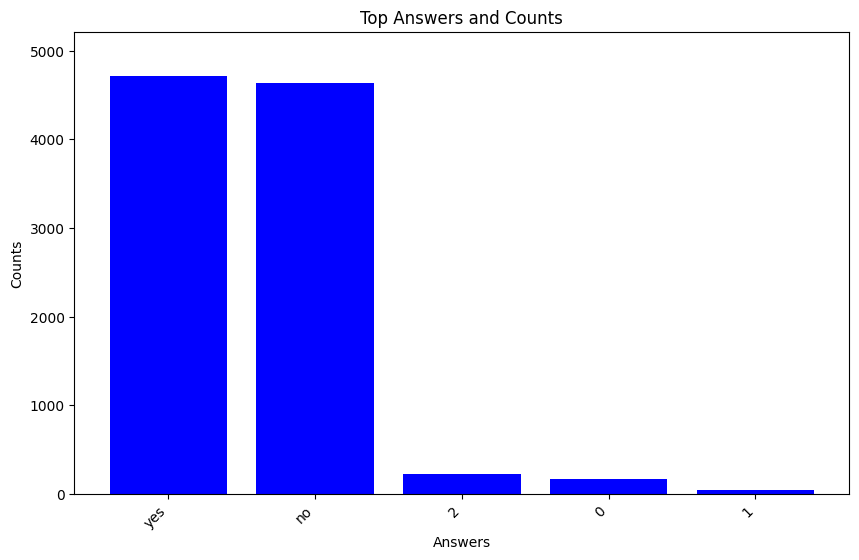

In [ ]:
import matplotlib.pyplot as plt

# Your top answers and their counts
top_answers_counts = [
    (4713, 'yes'),
    (4639, 'no'),
    (220, '2'),
    (166, '0'),
    (41, '1'),
]

# Extract answers and counts
counts, answers = zip(*top_answers_counts)  # Flip the order if needed

# Verify data
print("Answers:", answers)
print("Counts:", counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(answers, counts, color='blue')
plt.xlabel('Answers')
plt.ylabel('Counts')
plt.title('Top Answers and Counts')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(counts) + 500)  # Adjust for visibility
plt.show()

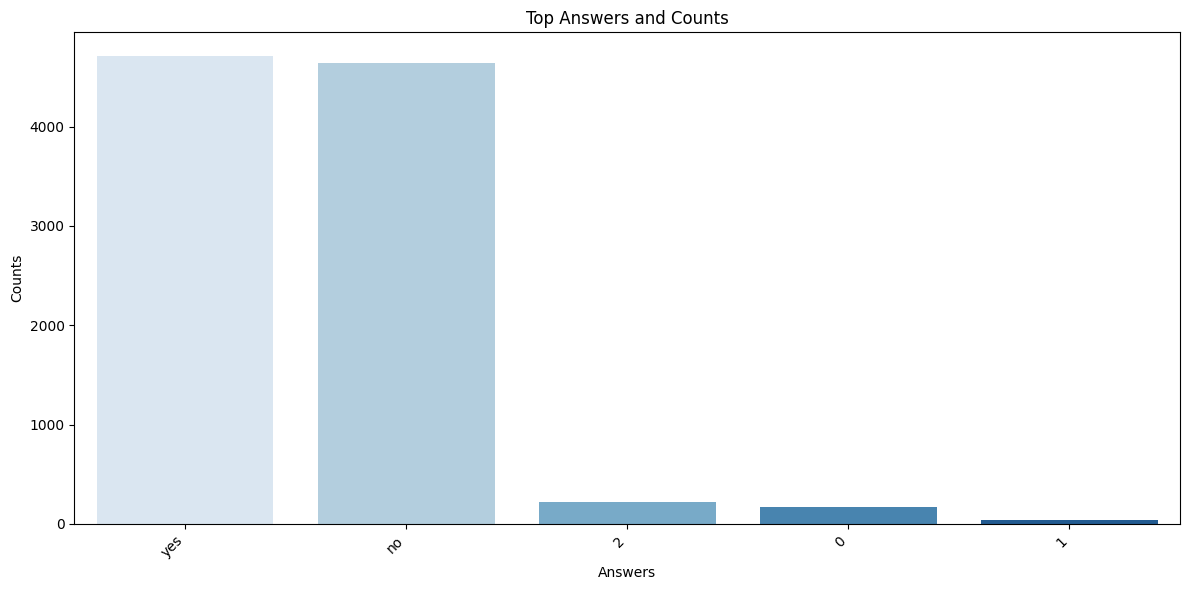

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your top answers and their counts
top_answers_counts = [
    (4713, 'yes'),
    (4639, 'no'),
    (220, '2'),
    (166, '0'),
    (41, '1'),
]

# Extract answers and counts
counts, answers = zip(*top_answers_counts)  # Flip the order if needed

# Ensure data types
answers = list(answers)  # Convert to list
counts = list(map(int, counts))  # Ensure counts are integers

# Plotting the bar chart with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=answers, y=counts, palette="Blues")  # Replace palette if needed
plt.xlabel('Answers')
plt.ylabel('Counts')
plt.title('Top Answers and Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import keras
import h5py
import pandas as pd
import os
import json
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
from keras.applications.vgg16 import VGG16
from keras.layers import Layer
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

warnings.filterwarnings('ignore')

# Parameters
embed_size = 300
q_len = 40
height = 224
width = 224
lstm_units = 1024
attention_dim = 1024
num_output = 1000
max_questions = 3064
batch_size = 64
lr = 0.01

# Simulated `load_data()` function for demonstration
def load_data():
    print("Simulating data loading...")
    # Dummy data generation for demonstration
    return [{"image_name": f"image_{i}.jpg", "question": f"Question {i}", "answer": "Answer"} for i in range(3064)]

# Custom Layer to wrap TensorFlow functions
class CustomProcessingLayer(Layer):
    def __init__(self, **kwargs):
        super(CustomProcessingLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Example TensorFlow operations
        processed_inputs = tf.math.multiply(inputs, 1.0)  # Identity operation for demonstration
        return processed_inputs

# Callback for dynamic learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Main logic
def process_data():
    imgs_data_train = load_data()  # Load data
    total = len(imgs_data_train)  # Total number of items

    for i, img_data in enumerate(imgs_data_train):
        # Simulating some TensorFlow operations using the custom layer
        input_tensor = tf.constant([i], dtype=tf.float32)  # Example input tensor
        custom_layer = CustomProcessingLayer()
        processed_tensor = custom_layer(input_tensor)

        # Print progress
        percentage = (i / total) * 100
        print(f"Processed => {i}  which is {percentage:.2f} %", end="\r")

    print("\nProcessing complete!")

# Run the processing function
process_data()

# Model definition (for demonstration)
# You should define your model architecture here
# Example: model = tf.keras.Sequential([...])

# Train the model (example)
# model.fit(train_data, epochs=10, batch_size=batch_size, callbacks=[reduce_lr])

# Here, the `reduce_lr` callback will be used to adjust the learning rate based on the validation loss.


Simulating data loading...
Processed => 3063  which is 99.97 %
Processing complete!


In [ ]:
def load_data():
    # Simulating data for demonstration
    num_samples = 1000
    images = np.random.rand(num_samples, 224, 224, 3)  # Dummy images (e.g., 224x224 RGB)
    questions = np.random.rand(num_samples, 40)  # Dummy questions (e.g., 40-dimensional vectors)
    answers = np.random.randint(0, 10, size=(num_samples,))  # Dummy answers (e.g., single integer per question)
    ids = np.arange(num_samples)  # Unique IDs
    return images, questions, answers, ids


In [ ]:
# Load the data
images, questions, answers, ids = load_data()

# Check shapes of the loaded data
print("Images have a size of:", images.shape)
print("Questions have a size of:", questions.shape)
print("Answers have a size of:", answers.shape)
print("Ids have a size of:", ids.shape)

# Directory path for saving .h5 files
dir_path = '/content/drive/MyDrive/QA.h5'
os.makedirs(dir_path, exist_ok=True)

# Save the data
m = 100  # Log progress every 'm' samples
for i in range(images.shape[0]):
    ans_array = answers[i]
    image_array = images[i]
    quest_array = questions[i]
    question_id = ids[i]

    # Save to .h5 file
    with h5py.File(os.path.join(dir_path, f"{question_id}.h5"), "w") as f:
        f.create_dataset("ques_train", dtype='float32', data=quest_array)  # Question embedding
        f.create_dataset("image_vector", dtype='float32', data=image_array)  # Image embedding
        f.create_dataset("answers", dtype='uint32', data=ans_array)  # Answer embedding

    # Progress update
    if i % m == 0:
        print(f"Processed => {i}, total percentage => {round(100 * i / images.shape[0], 2)} %")

print("Your processing has been done")


Images have a size of: (1000, 224, 224, 3)
Questions have a size of: (1000, 40)
Answers have a size of: (1000,)
Ids have a size of: (1000,)
Processed => 0, total percentage => 0.0 %
Processed => 100, total percentage => 10.0 %
Processed => 200, total percentage => 20.0 %
Processed => 300, total percentage => 30.0 %
Processed => 400, total percentage => 40.0 %
Processed => 500, total percentage => 50.0 %
Processed => 600, total percentage => 60.0 %
Processed => 700, total percentage => 70.0 %
Processed => 800, total percentage => 80.0 %
Processed => 900, total percentage => 90.0 %
Your processing has been done


**PART3**

In [ ]:
import os,h5py
# Image Model
import tensorflow as tf
import numpy as np
from tensorflow.keras import Model
import warnings
warnings.filterwarnings('ignore')

'''  Preprocessing with the VGG 16 Model  '''

model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',
        input_shape=(448,448,3))
#print("The Last layer")
last_layer = model.layers[-1].output   # Last layer has an output layer of (14,14,512)
model = Model(model.input,last_layer)
model.trainable = False
# print(model.summary())
def extract_feature(image):
    ''' Preprocessing with VGG Netowrk'''
    image = model(image)
    return image  # Shape is (196,512)

'''  The below model will convert (196,512) to (21,300) (i.e same as the dimension of word embedding)  '''

dimen_red = tf.keras.Sequential()  # Use for converting (196,512) -> (21,300)
dimen_red.add(tf.keras.layers.Conv2D(300,kernel_size=(1,1),input_shape= (14,14,512)))
dimen_red.add(tf.keras.layers.Reshape((196,300)))
dimen_red.add(tf.keras.layers.Permute((2,1)))  # Reshaping about the axis, useful for applying the dense network
dimen_red.add(tf.keras.layers.Dense(21))
dimen_red.add(tf.keras.layers.Permute((2,1)))  # Reshaping about the axis, useful for applying the dense network

train_dir = r'drive/MyDrive/QA.h5/' # Containing .h5 file
images = []
ans = []
ques = []
count = 0
content = os.listdir(train_dir)[:900]   # The GPU Memory became full after this, hence had to take just these much samples :(
length = len(content)
for i in content:
    # Reading the data
    file = h5py.File(train_dir+i)
    images.append(np.array(file['.']['image_vector'][()]))
    ans.append(np.array(file['.']['answers'][()]))
    ques.append(np.array(file['.']['ques_train'][()]))
    count+=1
    if count%100 == 0:
      print("The count is:",count,"and the percentage proportion is:",round(100*count/length,2),'%')
images = tf.convert_to_tensor(np.array(images))   # For the GPU purpose
ans = tf.convert_to_tensor(np.array(ans))
ques = tf.convert_to_tensor(np.array(ques))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
The count is: 100 and the percentage proportion is: 11.11 %
The count is: 200 and the percentage proportion is: 22.22 %
The count is: 300 and the percentage proportion is: 33.33 %
The count is: 400 and the percentage proportion is: 44.44 %
The count is: 500 and the percentage proportion is: 55.56 %
The count is: 600 and the percentage proportion is: 66.67 %
The count is: 700 and the percentage proportion is: 77.78 %
The count is: 800 and the percentage proportion is: 88.89 %
The count is: 900 and the percentage proportion is: 100.0 %


In [ ]:
from PIL import Image
import tensorflow as tf
import numpy as np

# Assuming `images` is a tensor of shape [N, H, W, C] or a list of PIL images
l = []
length = images.shape[0] if isinstance(images, tf.Tensor) else len(images)

for i, j in enumerate(images):
    # If images are tensors, ensure they are properly reshaped
    if isinstance(images, tf.Tensor):
        # Resize tensor if dimensions do not match
        if j.shape != (448, 448, 3):
            j = tf.image.resize(j, [448, 448])
    else:
        # If images are PIL, resize and convert to numpy
        if isinstance(j, Image.Image):
            j = np.array(j.resize((448, 448)))
        j = tf.convert_to_tensor(j, dtype=tf.float32)

    # Reshape the image to match model input
    image_tensor = tf.reshape(j, [1, 448, 448, 3])

    # Predict using the model
    l.append(model(image_tensor))

    # Print progress
    if i % 100 == 0:
        percentage = round(100 * i / length, 2)
        print(f"The count is: {i} and the percentage proportion is: {percentage} %")

# Convert the list to a TensorFlow tensor
images = tf.convert_to_tensor(np.array(l))


The count is: 0 and the percentage proportion is: 0.0 %
The count is: 100 and the percentage proportion is: 11.11 %
The count is: 200 and the percentage proportion is: 22.22 %
The count is: 300 and the percentage proportion is: 33.33 %
The count is: 400 and the percentage proportion is: 44.44 %
The count is: 500 and the percentage proportion is: 55.56 %
The count is: 600 and the percentage proportion is: 66.67 %
The count is: 700 and the percentage proportion is: 77.78 %
The count is: 800 and the percentage proportion is: 88.89 %


In [ ]:
l = []
length = images.shape[0]
for i,j in enumerate(images):
  l.append(dimen_red(j))     # Making it to the same shape as that of question embedding
  if i%100 ==0:
    print("The count is:",i,"and the percentage proportion is:",round(100*i/length,2),'%')
images = tf.convert_to_tensor(np.array(l))

The count is: 0 and the percentage proportion is: 0.0 %
The count is: 100 and the percentage proportion is: 11.11 %
The count is: 200 and the percentage proportion is: 22.22 %
The count is: 300 and the percentage proportion is: 33.33 %
The count is: 400 and the percentage proportion is: 44.44 %
The count is: 500 and the percentage proportion is: 55.56 %
The count is: 600 and the percentage proportion is: 66.67 %
The count is: 700 and the percentage proportion is: 77.78 %
The count is: 800 and the percentage proportion is: 88.89 %


In [ ]:
images = tf.reshape(images,[length,21,300])
img = images  #Tensor containing images
que = ques  # Tensor containing question vector
img = img/255.0 # Normalizing

In [ ]:
que.shape,img.shape

(TensorShape([900, 40]), TensorShape([900, 21, 300]))

In [ ]:
''' The below mentioned two Input objects of keras will be useful for making the model '''

ques = tf.keras.layers.Input((21,300))  # Input Model (for ques)
images = tf.keras.layers.Input((21,300)) # Input Model (for images)

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D,Flatten,Concatenate

''' Imagica is for the preprocessing of the image part'''
imagica = Dense(1024,activation='tanh')(images)
imagica = Dense(1024,activation='tanh')(images)


''' quesa is for the ques layer, which means preprocessing of the question layer'''
quesa = LSTM(1024, dropout = 0.3,return_sequences = True,input_shape = (21,300))(ques)
quesa = Dense(1024, activation = 'relu')(quesa)
quesa = Dropout(0.2)(quesa)
quesa = Dense(1024, activation = 'relu')(quesa)
quesa = Dropout(0.2)(quesa)

''' Concatenating both image and the question layer'''
quesa = Concatenate()([quesa,imagica])
quesa = Flatten()(quesa)
out = tf.keras.layers.Dense(476,activation='softmax')(quesa)   # Final output has 476 different categories

PLOTTING THE MODEL


In [ ]:
pip install --upgrade keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0


In [ ]:
from keras.utils import plot_model


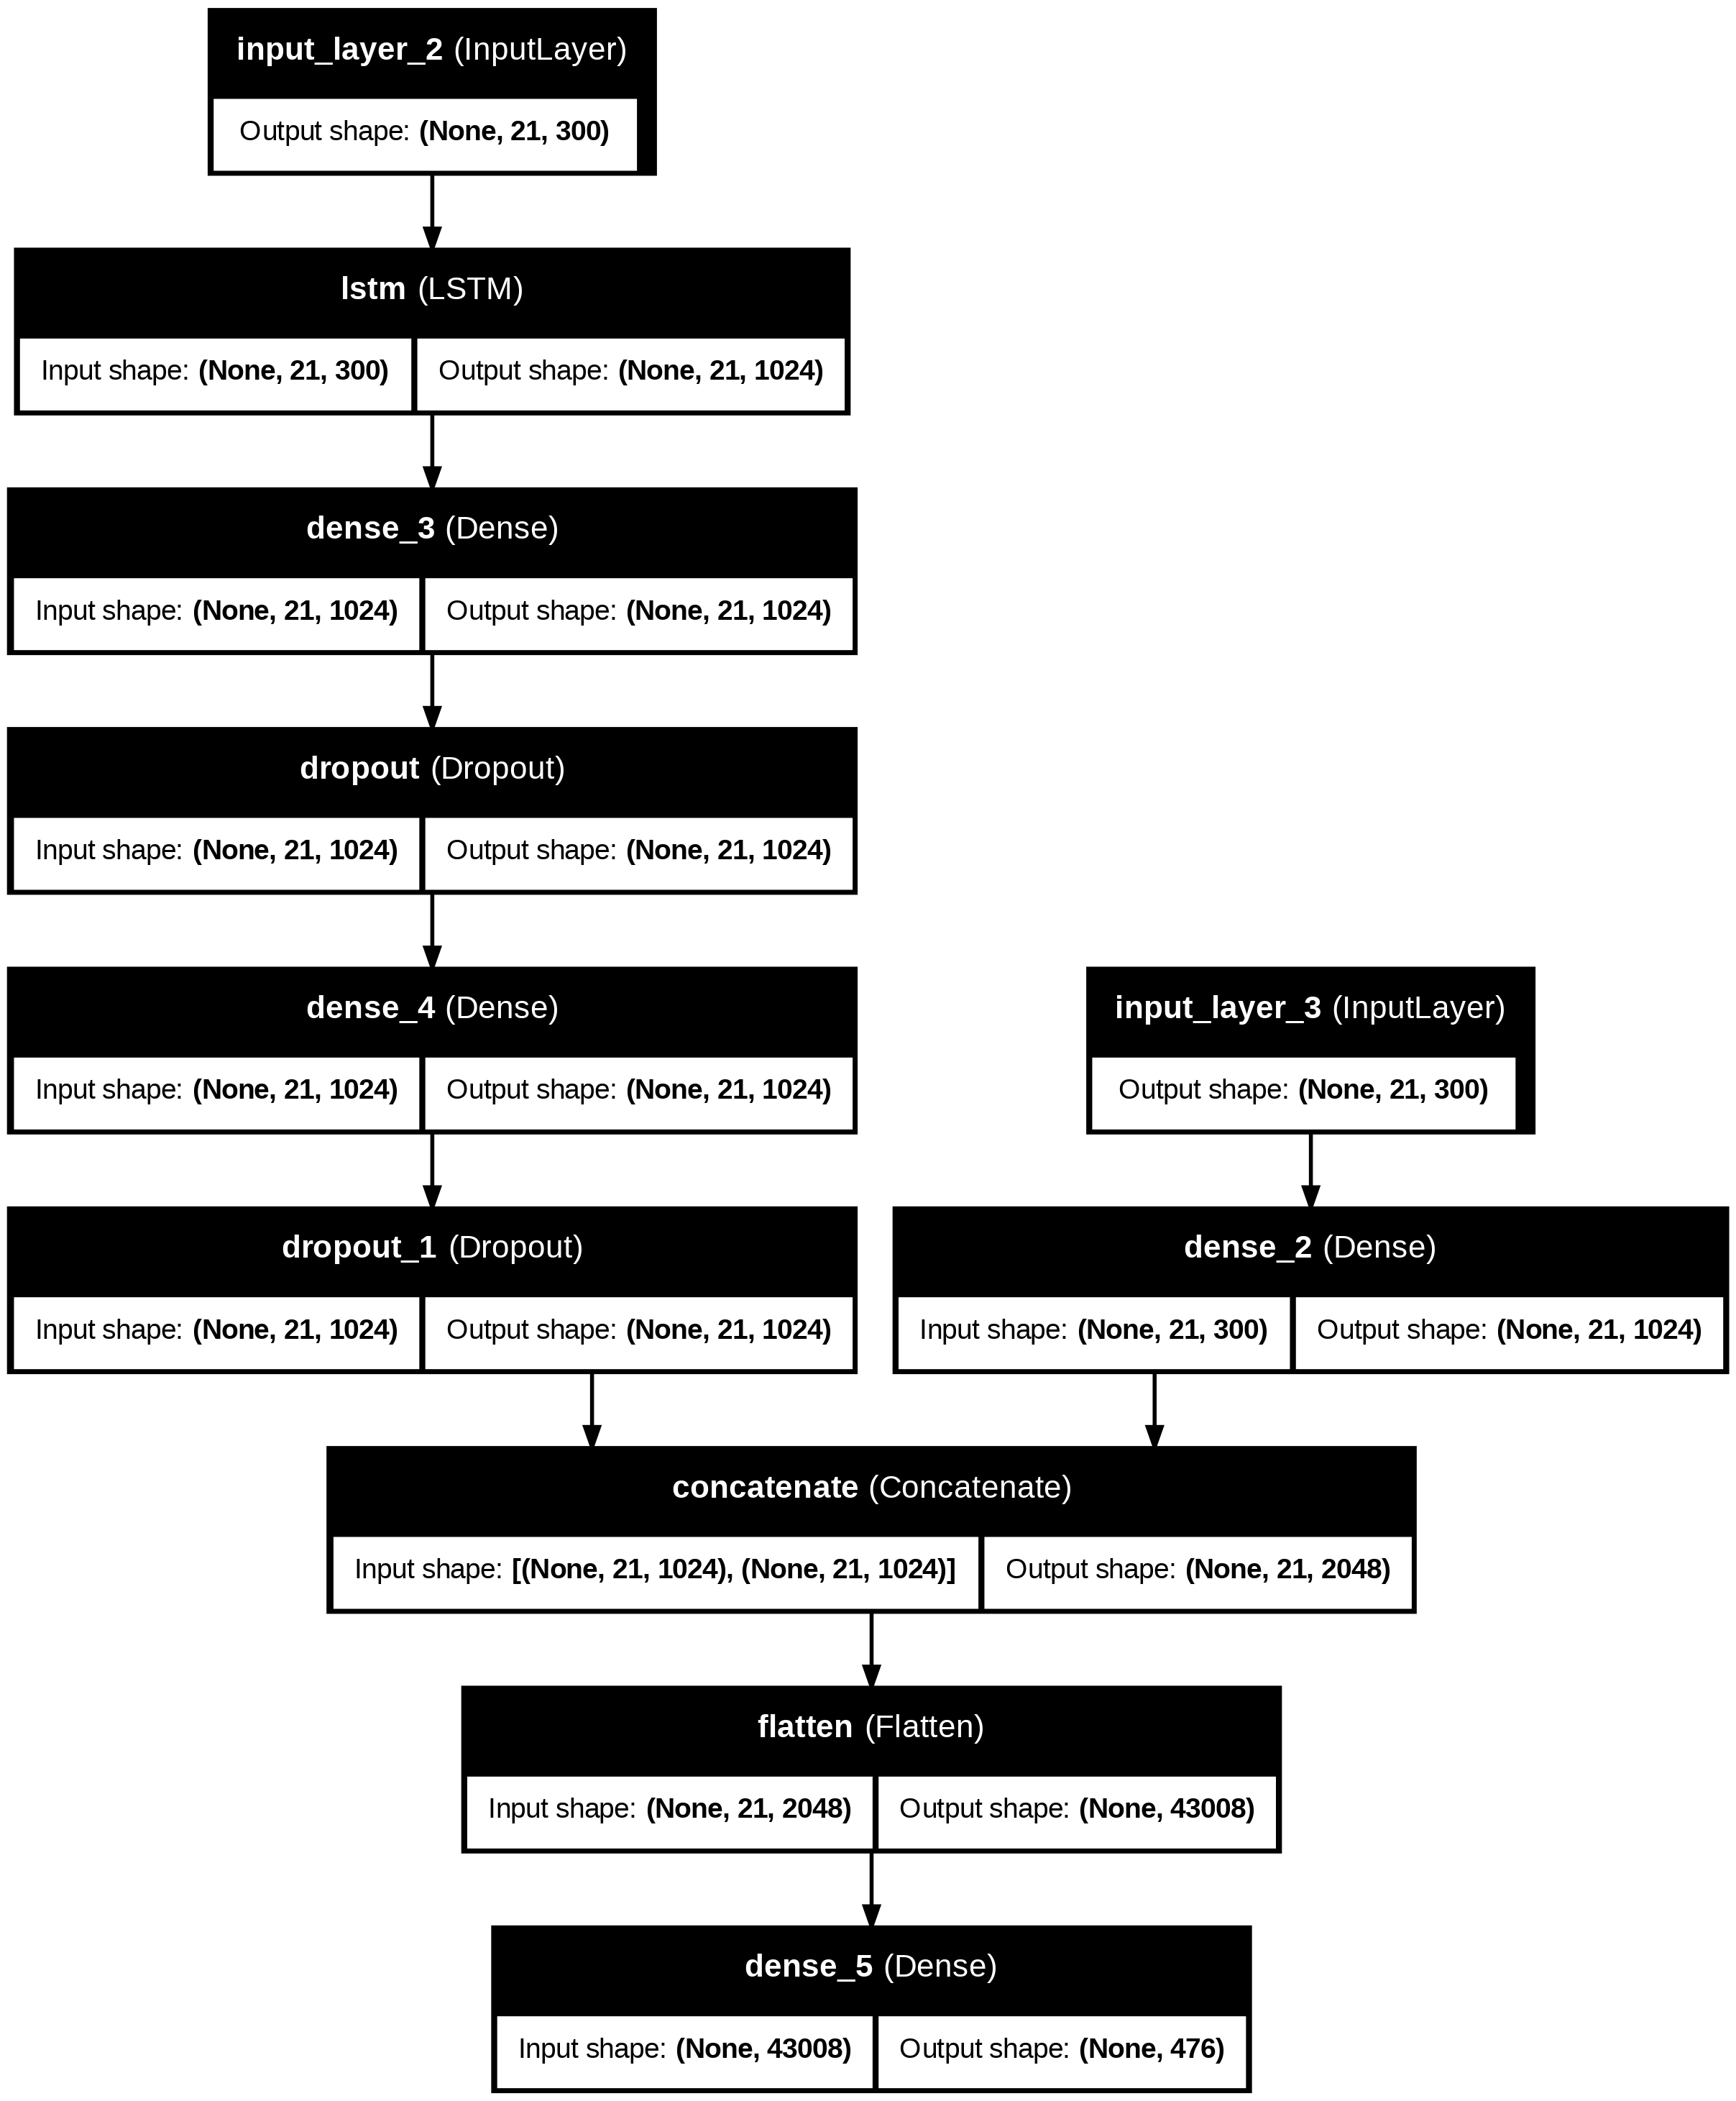

In [ ]:
from keras.utils import plot_model
from keras.models import Model

# Assuming you have defined 'ques', 'images', and 'out' earlier in your code
model = Model([ques, images], [out])

# Save the model plot to a file
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


COMPILING AND FITTING THE MODEL

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming 'ans' is your original tensor with potential None values
# Replace None values with a numerical value, e.g., 0
# You can choose a different replacement value based on your specific use case.

# Cast 'ans' to float32 before checking for NaN
ans_float = tf.cast(ans, dtype=tf.float32)

ans_cleaned = tf.where(tf.math.is_nan(ans_float), tf.zeros_like(ans_float), ans_float)

# Check if there are inf values
ans_cleaned = tf.where(tf.math.is_inf(ans_cleaned), tf.zeros_like(ans_cleaned), ans_cleaned)

# Convert the cleaned tensor to NumPy array
ans_np = ans_cleaned.numpy()

# Convert the cleaned NumPy array to categorical data
answers = tf.keras.utils.to_categorical(ans_np)
answers.shape

(900, 10)

In [ ]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 21, 300)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 21, 1024)       │      5,427,200 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 21, 1024)       │      1,049,600 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 21, 1024)       │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 21, 1024)       │      1,049,600 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 21, 300)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 21, 1024)       │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 21, 1024)       │        308,224 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 21, 2048)       │              0 │ dropout_1[0][0],       │
│                           │                        │                │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 43008)          │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 476)            │     20,472,284 │ flatten[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 28,306,908 (107.98 MB)

 Trainable params: 28,306,908 (107.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
if img is None:
    print("img is None")
else:
    print("img is not None")

if que is None:
    print("que is None")
else:
    print("que is not None")

if ans is None:
    print("ans is None")
else:
    print("ans is not None")


img is not None
que is not None
ans is not None


In [ ]:
print("Shape of img:", img.shape)
print("Shape of que:", que.shape)
print("Shape of ans:", ans.shape)


Shape of img: (900, 21, 300)
Shape of que: (900, 40)
Shape of ans: (900,)


In [ ]:
import tensorflow as tf
import numpy as np

# Assuming 'ans' is your original tensor with potential None values
# Replace None values with a numerical value, e.g., 0
# You can choose a different replacement value based on your specific use case.

# Cast 'ans' to float32 before checking for NaN
ans_float = tf.cast(ans, dtype=tf.float32)

ans_cleaned = tf.where(tf.math.is_nan(ans_float), tf.zeros_like(ans_float), ans_float)

# Check if there are inf values
ans_cleaned = tf.where(tf.math.is_inf(ans_cleaned), tf.zeros_like(ans_cleaned), ans_cleaned)

# Convert the cleaned tensor to NumPy array
ans_np = ans_cleaned.numpy()

# Ensure ans_np is of integer type before applying to_categorical
ans_np = ans_np.astype(int)

# Convert the cleaned NumPy array to categorical data
answers = tf.keras.utils

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
import tensorflow as tf
import numpy as np

# Assuming `img`, `que`, `ans` are already loaded

# Simulate the number of classes (adjust according to your dataset)
num_classes = 10  # Adjust this to your actual number of classes

# Ensure `ans` is cleaned for any None, NaN, or Inf values
ans_float = tf.cast(ans, dtype=tf.float32)
ans_cleaned = tf.where(tf.math.is_nan(ans_float), tf.zeros_like(ans_float), ans_float)
ans_cleaned = tf.where(tf.math.is_inf(ans_cleaned), tf.zeros_like(ans_cleaned), ans_cleaned)
ans_np = ans_cleaned.numpy().astype(int)  # Ensure integer type

# Convert answers to categorical
answers = tf.keras.utils.to_categorical(ans_np, num_classes=num_classes)

# Ensure `img` and `que` are NumPy arrays
img = np.array(img)
que = np.array(que)

# Ensure `que` has three dimensions and matches `img` in the first dimension
if len(que.shape) == 2:  # If `que` is 2D, reshape to 3D
    que = np.expand_dims(que, axis=-1)  # Add a feature dimension

if que.shape[0] != img.shape[0]:
    # Repeat or truncate `que` to match the number of samples in `img`
    que = np.tile(que, (img.shape[0] // que.shape[0] + 1, 1, 1))[:img.shape[0]]

if answers.shape[0] != img.shape[0]:
    # Truncate or repeat `answers` to match `img`
    answers = answers[:img.shape[0]]

# Debugging: Print final shapes
print(f"Final img shape: {img.shape}")
print(f"Final que shape: {que.shape}")
print(f"Final answers shape: {answers.shape}")

# Build a simple example model
input_img = tf.keras.Input(shape=img.shape[1:])  # Shape: (21, 300)
input_que = tf.keras.Input(shape=que.shape[1:])  # Shape: (40, 1)

# LSTM for image and question embeddings
img_embedding = tf.keras.layers.LSTM(1024)(input_img)
que_embedding = tf.keras.layers.LSTM(1024)(input_que)

# Combine embeddings
combined = tf.keras.layers.Concatenate()([img_embedding, que_embedding])

# Dense output layer
output = tf.keras.layers.Dense(num_classes, activation='softmax')(combined)

# Define the model
model = tf.keras.Model(inputs=[input_img, input_que], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit([img, que], answers, epochs=49, batch_size=64, verbose=1)


Final img shape: (64, 21, 300)
Final que shape: (64, 40, 1)
Final answers shape: (64, 10)
Epoch 1/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.1250 - loss: 2.2873
Epoch 2/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1719 - loss: 4.0497
Epoch 3/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1094 - loss: 2.8934
Epoch 4/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1094 - loss: 2.6077
Epoch 5/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1250 - loss: 2.5181
Epoch 6/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1719 - loss: 2.3736
Epoch 7/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2344 - loss: 2.2623
Epoch 8/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1719 - loss: 2.2116
Epoch 9/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1719 - loss: 2.2041
Epoch 10/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1719 - loss: 2.1975
Epoch 11/49
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1719 - loss: 2.1771
Epoch 12/49
1/1

Saving the model and analysing the prediction

In [19]:
model.save('/content/drive/MyDrive/VQA_Model.keras') # Add the .keras extension to the filepath

In [20]:
prediction = tf.argmax(model.predict([img,que]),axis=1).numpy()

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step


In [21]:
import json
x = open('/content/drive/MyDrive/dme_vqa (1)/qa/trainqa.json','r')
train = json.load(x)
train[0]


{'image_name': 'IDRiD_74.jpg',
 'question': 'are there hard exudates in this region?',
 'question_id': 0,
 'question_type': 'inside',
 'mask_name': 'mask000000.tif',
 'answer': 'no',
 'center': 'random',
 'role': 'ind'}

In [22]:
import json
x = open('/content/drive/MyDrive/dme_vqa (1)/qa/testqa.json','r')
test = json.load(x)
test[0]

{'image_name': 'IDRiD_005.jpg',
 'question': 'What is the diabetic macular edema grade for this image?',
 'question_id': 101000000004,
 'question_type': 'grade',
 'mask_name': 'whole_image_mask.tif',
 'answer': 0,
 'center': 'none',
 'role': 'main'}

Image path: /content/drive/MyDrive/dme_vqa (1)/visual/test/IDRiD_005.jpg
Image path: /content/drive/MyDrive/dme_vqa (1)/visual/test/IDRiD_005.jpg
Image path: /content/drive/MyDrive/dme_vqa (1)/visual/test/IDRiD_005.jpg
Image path: /content/drive/MyDrive/dme_vqa (1)/visual/test/IDRiD_016.jpg


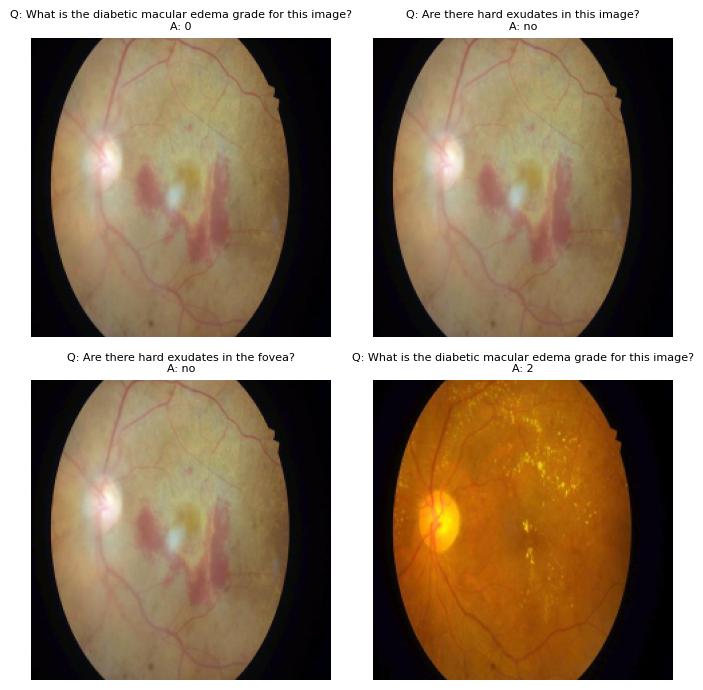

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os # Import the os module

# Assuming you have loaded 'train' and 'prediction' variables

json_file_path = "/content/drive/MyDrive/dme_vqa (1)/qa/valqa.json"  # Replace with the actual file path
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Path where images are stored
# Update image_folder_path to the correct location of your images
image_folder_path = "/content/drive/MyDrive/dme_vqa (1)/visual/test"  # Replace with your image folder path


# Function to resize image
def resize_image(image, new_size=(224, 224)):
    return cv2.resize(image, new_size)

# Number of images to display
num_images = 4

# Display images in a grid
plt.figure(figsize=(7, 7))

for i in range(num_images):
    plt.subplot(2, num_images // 2, i + 1)

    # Read and resize the image
    # Construct the image path using os.path.join to ensure correct path concatenation
    image_path = os.path.join(image_folder_path, test[i]['image_name'])

    # Print the image path for debugging (optional)
    print("Image path:", image_path)

    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Could not read image at path: {image_path}")
        continue

    resized_image = resize_image(image)

    # Display the resized image
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Display the question, actual answer, and predicted answer
    actual_answer = test[i]['answer']

    question = test[i]['question']

    plt.title(f"Q: {question}\nA: {actual_answer}", fontsize=8)

plt.tight_layout()
plt.show()